In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/New folder/50_Startups.csv")

In [2]:
import numpy as np
MP =np.mean(A.PROFIT)

In [3]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
Q=[]
for i in A.PROFIT:
    if(i<MP):
        Q.append(0)
    else:
        Q.append(1)

In [32]:
A['newp']=Q

In [62]:
X=A[["RND","MKT"]]
Y=A[["newp"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
#xtest['predicted']=pred
#xtest['actual']=ytest

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

[[2 0]
 [1 7]]
0.9


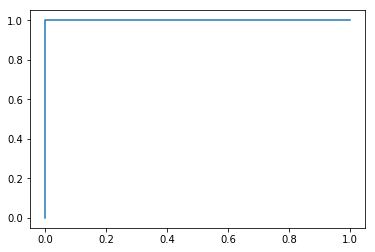

In [68]:
pred_probs=model.predict_proba(xtest)
p1=pred_probs[:,1]
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresholds=roc_curve(ytest,p1)
r1=roc_auc_score(ytest,p1)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,r1)
